In [11]:
#Correr esta celda si estas en collab para instalar Pennylane

!pip install pennylane

#Pennylane

Pennylane es una libreria de programación de cómputo cuántico. Lo interesante de Pennylane, es que nos da algunas opciones que qiskit no tiene. Posteriormente con el uso de algoritmos cuánticos variacionales se vuelve una herramiente sumamente util, porque lo que permite, es que realicemos Cómputo cuántico Diferenciable.


Contrastemos

En Qiskit, definimos el circuito, medimos, y ahí se acaba la cosa. Qiskit nos va a servir mucho para algoritmos sencillos, pero Pennylane nos promete algo

Construir algoritmos cuánticos que puedan depender de funciones diferenciables.


En Pennylane, el eslabón principal con el cual se travaja, son los QNodes o Nodos cuánticos

In [12]:
# la forma típica e invocar a pennylane es como qml

import pennylane as qml
import numpy as np

In [13]:
#Para trabajar, necesitamos un dispositivo
#Por default, usaremos el dispositivo dev

dev = qml.device('default.qubit', wires=2)  #wires=número de qubits

In [ ]:
#Igual podemos tener devices que nombren a cada una de sus wires:

#dev = qml.device('default.qubit', wires=['q1', 'q2'])

In [14]:
#Desglosemos juntos esto. Veamos como Pennylane adquiere la naturaleza de
#función desde el inicio, dependiendo de x y y

def my_quantum_function(x, y):
    qml.RZ(x, wires=0)  #Las Wires son los qubits
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.Z(wires=1))  #Especificamos sobre que base medimos y  que qubit tambien

#Si nuestro device es de entradas nombradas, podemos asignar acada entrada el valor que mencionemos

#def my_quantum_function(x, y):
#  qml.RZ(x, wires='q1')
#  qml.CNOT(wires=['q1', 'q2'])
#  qml.RY(y, wires='q2')
#  return qml.expval(qml.Z(wires='q2'))#

Este código presentado anteriormente es una función cuántica. Pennylane trabaja en su mayoría con funciones cuánticas. Para entender que ocurrió anteriormente, basta con leer el código con el cual trabajamos:

Recordemos que

$$
R_X(\theta) =
\begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) \\
-i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

$$
R_Y(\theta) =
\begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\
\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

$$
R_Z(\theta) =
\begin{pmatrix}
e^{-i\frac{\theta}{2}} & 0 \\
0 & e^{i\frac{\theta}{2}}
\end{pmatrix}
$$

Lo que hizo la función anterior es, aplicames la rotación en Z con un angulo theta=x al estado inicial en el qubit 0, posteriormente un CNOT entre los qubits 0 y 1, y para finaliar una rotación en y en el qubit 1. Lo interesante, es que al ser una función, nosotros controlamos el valor asignado a las rotaciones con las que trabajemos

Piensalo de esta forma

El device es la maquina con la que trabajas

La quantum function es la receta con la que haras trabajar la máquina

¿Entonces que hacemos ahora?


Exactamente, las juntamos

In [19]:
#Fabricamos el nodo con el que trabajamos juntando la función, y el device

qnode = qml.QNode(my_quantum_function, dev)

#Y en función de lo que necesitemos, recuperaremos diversa información

qnode(0.3, 2)  #Puedes jugar con los valores como te plazca

np.float64(-0.4161468365471424)

El Qnode nos devuelve la información que nosotros le pidamos al sistema, en función de lo que necesitemos y de los valores que le asignemos.

Esto es la magia de Pennylane, todo se puede trabajar como si de una función se tratara

Una forma mas común de trabajar los circuitos es la siguiente:

In [20]:
@qml.qnode(dev)  #El @ funciona como conector para fabricar el qnode
def my_quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.Z(wires=1))

my_quantum_function(0.3, 2)

np.float64(-0.4161468365471424)

Para visualizar los circuitos, podemos aplicar circuitos draw similares a los que vemos en qiskit

In [29]:
@qml.qnode(dev)
def qc(x):
    qml.Hadamard(wires=0)
    qml.RX(x, wires=0)
    return qml.expval(qml.Z(0))



In [31]:
qml.draw(qc)(0.5) #el 0.5 evita que se confunda con una función

'0: ──H──RX(0.50)─┤  <Z>'

(<Figure size 500x200 with 1 Axes>, <Axes: >)

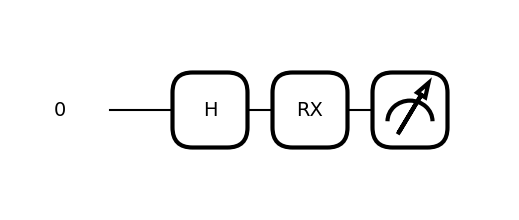

In [23]:
qml.draw_mpl(qc)(0.5) #para mostrarlo de forma mas elegante